In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# notebook嵌入图片
%matplotlib inline
# 提高分辨率
%config InlineBackend.figure_format='retina'
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/root/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf")
import warnings
warnings.filterwarnings('ignore')
# 示例：加载 CSV 文件
data = pd.read_csv("/root/work/SCBAnalysis/src/data/features.csv",encoding="gbk")  # 替换为你的文件路径

# 查看数据的一部分
print(data.head())


   CardNo Sex   Major  Card_Count  Frequency Most_Frequent_Place  Avg_Storage  \
0  180001   男  18国际金融       215.0         32                第四食堂    25.443750   
1  180002   男  18国际金融       269.0         46                第一食堂    66.347826   
2  180004   男  18国际金融       843.0         96                第五食堂    65.603125   
3  180005   男  18国际金融       693.0         35                第五食堂    81.665714   
4  180006   男  18国际金融       415.0         23                第五食堂    41.160870   

   Avg_Spending  
0      5.386667  
1      4.226667  
2     19.066667  
3      6.170000  
4      2.856667  


In [6]:
# 假设你要分析的数据位于数据框的多个列中，不包括标签列（如果有的话）
# 手动去除非数值型变量
#PCA 对数据的尺度非常敏感，因此通常需要对数据进行标准化（例如将每个特征转换为零均值和单位方差）。
features = data.drop('Sex', axis=1)  # 如果有标签列，记得剔除
features = features.drop('Major', axis=1)  
features = features.drop('Most_Frequent_Place', axis=1)
# 数据标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 查看标准化后的数据
print(scaled_features[:5])

[[-1.71407208 -1.80516696 -1.03966351 -1.18846513 -0.82901759]
 [-1.71327143 -1.55918411 -0.68240118 -0.13034818 -1.05586461]
 [-1.71167015  1.05552243  0.59353574 -0.14961229  1.84621279]
 [-1.71086951  0.37223675 -0.9631073   0.26589882 -0.67583066]
 [-1.71006887 -0.89411938 -1.26933216 -0.78189072 -1.32377876]]


In [24]:
# 执行 PCA，假设我们要将数据降到 2 维
pca = PCA(n_components=4)
principal_components = pca.fit_transform(scaled_features)

# 创建一个新的 DataFrame，将主成分添加为新列
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3', 'PC4'])

# 如果有目标标签（例如分类任务），你可以将其添加到 DataFrame 中
# pca_df['target'] = data['target']

# 查看降维后的数据
print(pca_df.head())

        PC1       PC2       PC3       PC4
0 -2.117518 -1.828688  0.433826  1.099294
1 -1.565096 -1.567792  1.174367  0.494210
2  2.054923 -1.363802 -0.033193  1.103905
3 -0.379125 -1.641496  1.010240 -0.423196
4 -1.895362 -1.933457  0.590987  0.108221


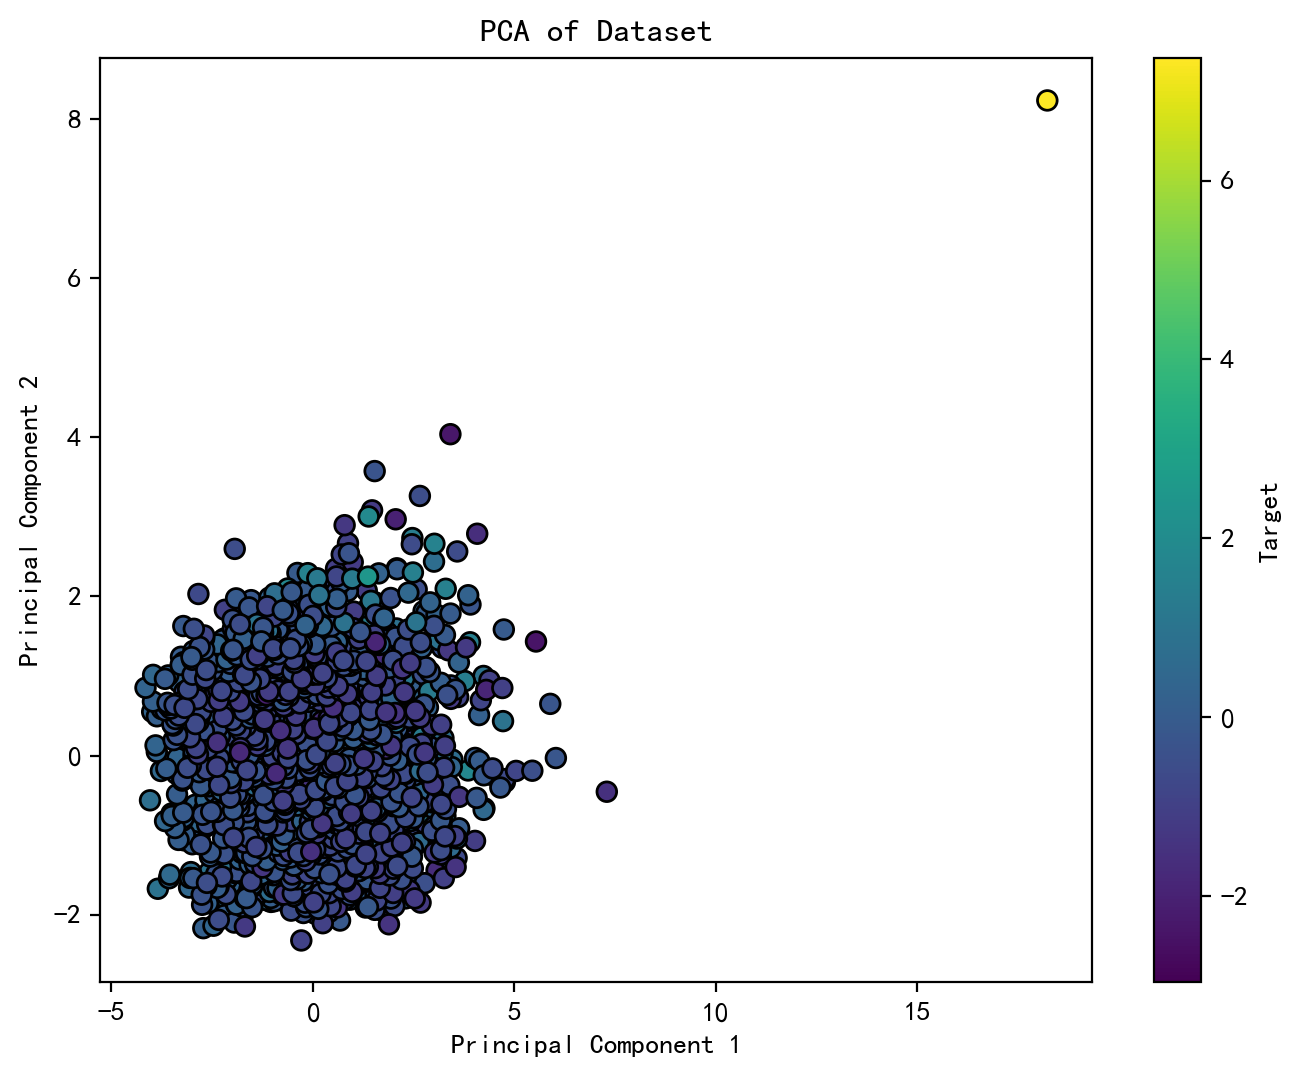

In [26]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PC4'], cmap='viridis', edgecolor='k', s=50)
plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Target')
plt.show()

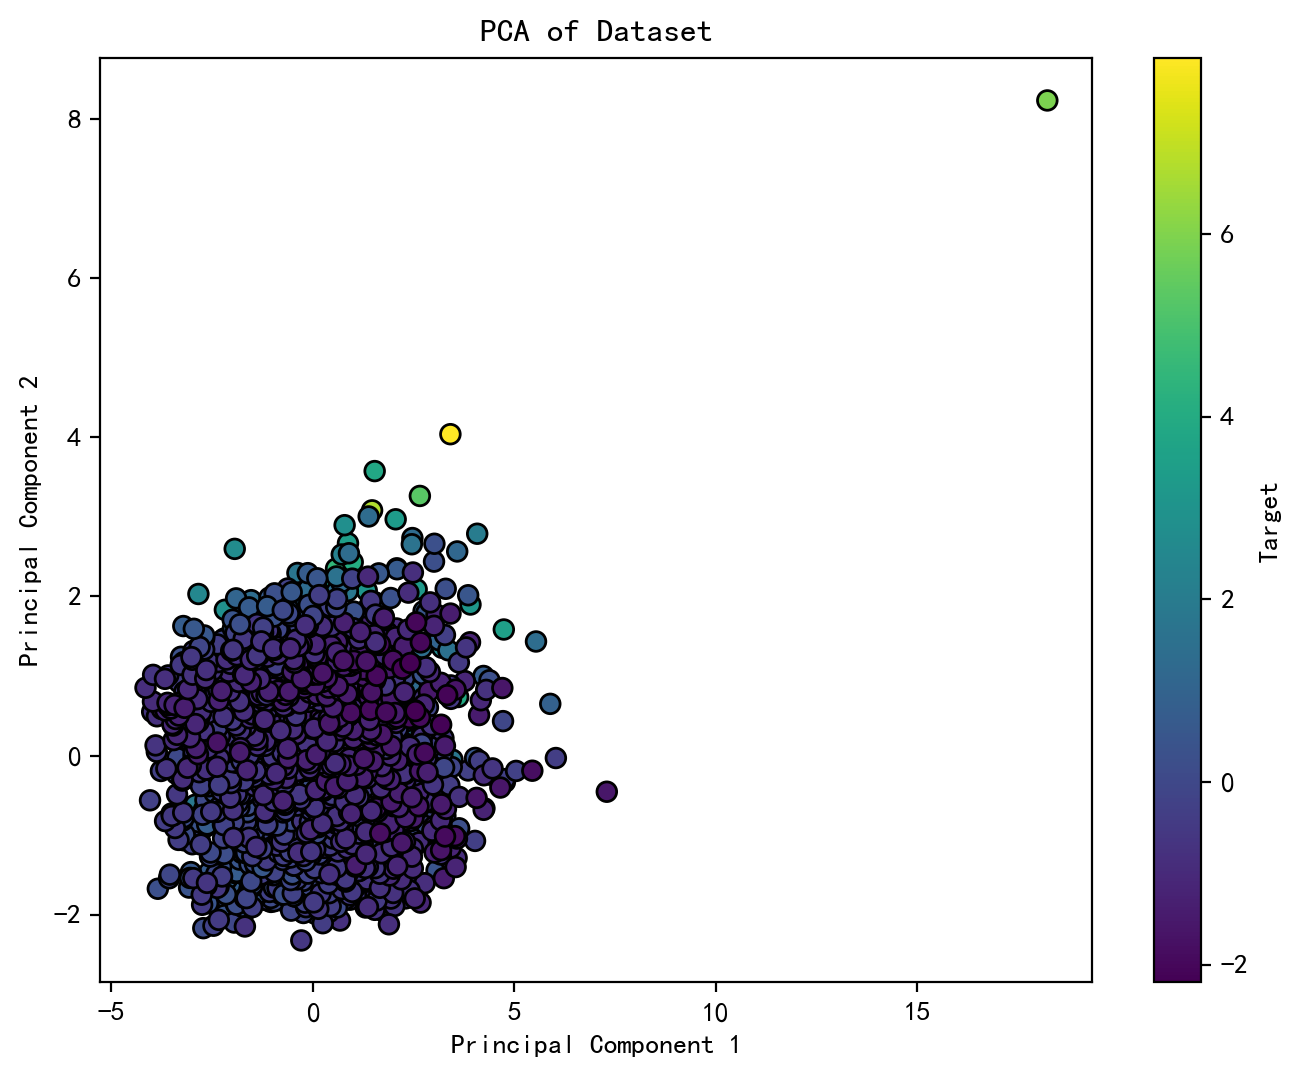

In [28]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PC3'], cmap='viridis', edgecolor='k', s=50)
plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Target')
plt.show()

In [29]:
# 查看每个主成分的方差比例
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 查看所有主成分的累计解释方差
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.51568246 0.20258845 0.16668038 0.08237775]
Cumulative explained variance: [0.51568246 0.7182709  0.88495128 0.96732904]
